## I. Understand data

**1.1 Peak data**

In [46]:
import pandas as pd
import numpy as np
data = pd.read_csv('results.csv') #2014
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


**1.2 Dimensions of Data**

In [47]:
data.shape

(31984, 21)

Dữ liệu có 31984 quan sát và 21 cột.

**1.3 Data type of each Attribute**

In [48]:
data.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

Hầu hết các attribute ở dạng object. Vậy ta phải chuyển về dạng số thực

In [49]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

'5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half'

In [50]:
list = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for i in list:
    data = data.drop(data[data[i] == '-'].index, axis =0)

In [51]:
list = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for i in list:
    data[i]= data[i].astype(float)

**1.4 Descriptive Statistics**

In [52]:
data.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,133.581175,42.385067,241.952383,8002.921988,196.033373,15833.958924,9.236463,163.894883,25.678261,111.211481,105.321404,228.189990
std,8.710102,1704.843679,25.571480,11.299795,50.842552,4733.255987,40.775036,9182.223743,1.939150,32.889354,4.215381,20.306387,19.159500,48.074493
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.370000,607.000000,115.430000,33.000000,205.300000,3940.000000,166.950000,7880.000000,7.830000,140.520000,22.620000,96.750000,91.670000,193.620000
50%,50.280000,1418.000000,128.850000,42.000000,231.980000,7919.000000,187.850000,15829.000000,8.850000,157.500000,25.050000,107.680000,102.000000,218.470000
75%,57.000000,2601.000000,147.700000,50.000000,272.200000,11893.000000,219.370000,23785.000000,10.380000,182.200000,28.400000,122.680000,116.150000,256.570000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


In [53]:
data.describe(include='O')

,name,gender,bib,ctz,state,country,city
count,31649,31649,31649,1238,29103,31649,31648
unique,31581,2,31649,84,68,78,5905
top,"Allen, Mark",M,10688,GBR,MA,USA,Boston
freq,2,17484,1,171,7427,26939,1018


**1.5 Check missing values**

In [54]:
data.isna().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30411
35k              0
overall          0
pace             0
state         2546
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

**1.6 Handling missing values**

In [55]:
data = data.dropna(subset=['city'])
data = data.drop(columns=['ctz', 'state'])

Kiểm tra lại lần nữa

In [56]:
data.isna().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

Dữ liệu giờ đã hết missing value

In [57]:
data.describe(include='O')

,name,gender,bib,country,city
count,31648,31648,31648,31648,31648
unique,31580,2,31648,78,5905
top,"Jones, David",M,10688,USA,Boston
freq,2,17484,1,26939,1018


In [58]:
data = data.drop(columns=['name', 'bib'])

In [59]:
n= data[['gender', 'country', 'city']]

In [60]:
n.shape

(31648, 3)

In [61]:
# Encode cái feature category
onehot = pd.get_dummies(data=n, columns=['gender', 'country', 'city'])

In [62]:
type(onehot)

pandas.core.frame.DataFrame

In [65]:
onehot.shape

(31648, 5985)

In [63]:
data = data.drop(columns=['gender', 'country', 'city'])
new_data = pd.concat([data, onehot], axis=1, sort=False)

In [64]:
new_data.shape

(31648, 5999)

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
#new_data = data[['10k', 'age']]

In [67]:
kmean = KMeans(n_clusters=2)
kmean.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
centroids = kmean.cluster_centers_
print(centroids)

[[ 4.53122794e+01  1.20430375e+03  1.14778976e+02 ...  6.18888476e-05
   6.18888476e-05 -1.30510837e-17]
 [ 5.82183099e+01  2.67228186e+03  1.53194631e+02 ... -1.24683250e-17
  -1.24683250e-17  6.45577792e-05]]


In [71]:
y_kmeans = kmean.predict(new_data)

đánh nhãn, ví dụ 2 cụm thì nhãn 0, 1. 

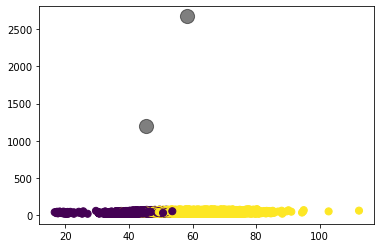

In [73]:
plt.scatter(data['10k'], data['age'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

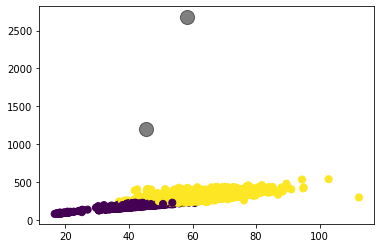

In [74]:
plt.scatter(data['10k'], data['official'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

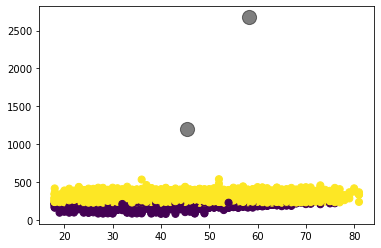

In [75]:
plt.scatter(data['age'], data['official'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);